In [1]:
from tensorflow import keras

keras.__version__

'2.4.0'

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.19.5'

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import sys
%matplotlib inline
import matplotlib.pyplot as plt



### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
white_wine = pd.read_csv("winequality-white.csv")
red_wine = pd.read_csv("winequality-red.csv")

display(white_wine)
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [7]:
def generate_data(df, t_r):

    df = df.values
    X_train,X_test = train_test_split(df, train_size = t_r, shuffle = False, random_state = 1004)
    Y_train = X_train[:,11]
    X_train = X_train[:,:11]
    Y_test = X_test[:,11]
    X_test = X_test[:,:11]
    Y_train = np_utils.to_categorical(Y_train,11)
    Y_test = np_utils.to_categorical(Y_test,11)



    return X_train, Y_train, X_test, Y_test

In [8]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)
X_train, Y_train, X_test, Y_test = generate_data(red_wine,0.7)

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units = 32,input_dim = 11,activation = 'relu'))
model.add(keras.layers.Dense(units = 11,activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
              
           

hist = model.fit(x_train,y_train,epochs=200,batch_size=64,validation_data = (x_test,y_test))

Epoch 1/200
54/54 [==============================] - 3s 47ms/step - loss: 8.4635 - accuracy: 0.3814 - val_loss: 2.2443 - val_accuracy: 0.4429
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 2.4012 - accuracy: 0.3973 - val_loss: 1.3891 - val_accuracy: 0.4673
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 1.4149 - accuracy: 0.4229 - val_loss: 1.3068 - val_accuracy: 0.4980
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 1.3684 - accuracy: 0.4323 - val_loss: 1.2132 - val_accuracy: 0.4939
Epoch 5/200
54/54 [==============================] - 0s 4ms/step - loss: 1.3255 - accuracy: 0.4342 - val_loss: 1.2664 - val_accuracy: 0.4224
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 1.3599 - accuracy: 0.4211 - val_loss: 1.1949 - val_accuracy: 0.4748
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 1.2733 - accuracy: 0.4259 - val_loss: 1.1771 - val_accuracy: 0.4816
Epoch 8/200


* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화


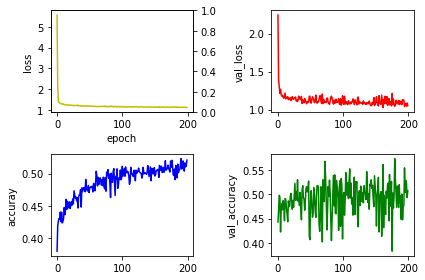

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax =ax1.twinx()

ax1.plot(hist.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

=> comment
epoch이 0에 가까이 떨어지지 않는 것을 확인할 수 있었다. 아직 train이 완벽하게 되지 않았다고 생각한다.


In [12]:
model.evaluate(x_test,y_test,verbose =2)

46/46 - 0s - loss: 1.0526 - accuracy: 0.5075


[1.0526217222213745, 0.5074830055236816]

In [13]:
model_white = keras.models.Sequential()
model_white.add(keras.layers.Dense(units = 32,input_dim = 11,activation = 'relu'))
model_white.add(keras.layers.Dense(units = 11,activation = 'softmax'))

model_white.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
              
           

hist = model_white.fit(X_train,Y_train,epochs=200,batch_size=64,validation_data = (x_test,y_test))

Epoch 1/200
18/18 [==============================] - 1s 23ms/step - loss: 12.1766 - accuracy: 0.0203 - val_loss: 13.9985 - val_accuracy: 0.3605
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 6.8358 - accuracy: 0.2004 - val_loss: 7.6437 - val_accuracy: 0.1986
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 3.1394 - accuracy: 0.2763 - val_loss: 5.9134 - val_accuracy: 0.3122
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 2.0778 - accuracy: 0.4619 - val_loss: 3.7517 - val_accuracy: 0.3401
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 1.6497 - accuracy: 0.4940 - val_loss: 3.8524 - val_accuracy: 0.2898
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 1.4971 - accuracy: 0.4832 - val_loss: 3.6825 - val_accuracy: 0.2952
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 1.4230 - accuracy: 0.4954 - val_loss: 3.3274 - val_accuracy: 0.2878
Epoch 8/20

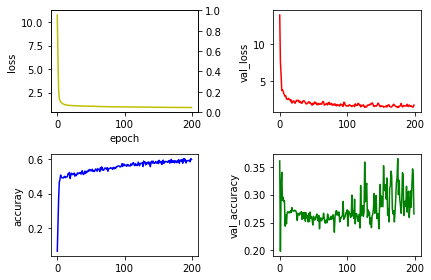

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [35]:
model_white.evaluate(X_test,Y_test,verbose =2)

61/61 - 0s - loss: 1.8307 - accuracy: 0.2523


[1.8307231664657593, 0.2523076832294464]

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [15]:
from keras.layers import BatchNormalization

model2 =keras. models.Sequential()

model2.add(keras.layers.Dense(units = 64,input_dim = 11,activation = 'relu'))
model2.add(keras.layers.Dense(units = 32,activation = 'relu'))
model2.add(keras.layers.Dense(units = 16,activation = 'relu'))
model2.add(keras.layers.Dense(units = 32,activation = 'relu'))

model2.add(keras.layers.Dense(11,activation = 'softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

hist2 = model2.fit(x_train,y_train,epochs=1000,batch_size=64,validation_data = (x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 11)                363       
Total params: 4,283
Trainable params: 4,283
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
54/54 [==============================] - 1s 9ms/step - loss: 4.4222 - accuracy: 0.2213 - val_loss: 1.2704

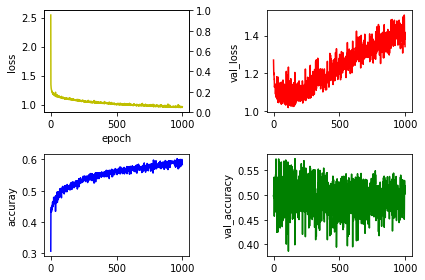

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist2.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist2.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist2.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist2.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [17]:
model2.evaluate(x_test,y_test,verbose =2)

46/46 - 0s - loss: 1.3417 - accuracy: 0.5184


[1.3416523933410645, 0.518367350101471]

In [20]:
from keras.layers import BatchNormalization

model3 =keras. models.Sequential()

model3.add(keras.layers.Dense(units = 16,input_dim = 11,activation = 'relu'))
model3.add(keras.layers.Dense(units = 32,activation = 'relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(units = 20,activation = 'relu'))
model3.add(keras.layers.Dense(11,activation = 'softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

hist3 = model3.fit(x_train,y_train,epochs=800,batch_size=64,validation_data = (x_test,y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_16 (Dense)             (None, 11)                231       
Total params: 1,627
Trainable params: 1,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
54/54 [==============================] - 1s 9ms/step - loss: 24.0096 - accuracy: 0.0691 - val_loss: 1.5127

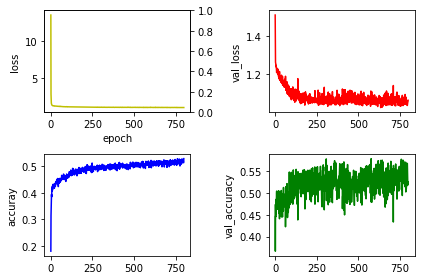

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist3.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist3.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist3.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist3.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [24]:
model3.evaluate(x_test,y_test,verbose =2)

46/46 - 0s - loss: 1.0638 - accuracy: 0.5245


[1.063830852508545, 0.5244898200035095]

In [89]:
from keras.layers import BatchNormalization

model2_w =keras. models.Sequential()

model2_w.add(keras.layers.Dense(units = 64,input_dim = 11,activation = 'relu'))
model2_w.add(keras.layers.Dense(units = 32,activation = 'relu'))
model2_w.add(keras.layers.Dense(units = 16,activation = 'relu'))
model2_w.add(keras.layers.Dense(units = 32,activation = 'relu'))

model2_w.add(keras.layers.Dense(11,activation = 'softmax'))

model2_w.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2_w.summary()

hist2_W = model2_w.fit(X_train,Y_train,epochs=1000,batch_size=64,validation_data = (X_test,Y_test))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_91 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_92 (Dense)             (None, 11)                363       
Total params: 4,283
Trainable params: 4,283
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 4ms/step - loss: 3.0271 - accuracy: 0.1952 - val_loss: 1.365

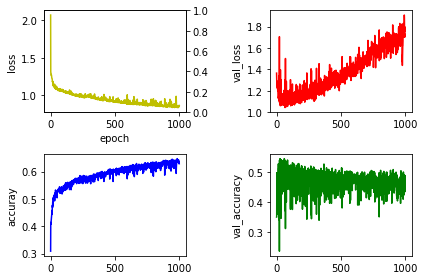

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist2_W.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist2_W.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist2_W.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist2_W.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [91]:
model2_w.evaluate(X_test,Y_test,verbose =2)

61/61 - 0s - loss: 1.7150 - accuracy: 0.4544


[1.7149666547775269, 0.4543589651584625]

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [25]:
wine = pd.concat([red_wine,white_wine],ignore_index = True)
X_train, Y_train, X_test, Y_test = generate_data(wine, 0.7)

In [74]:
model_all_ = keras.models.Sequential()
model_all_.add(keras.layers.Dense(units = 32,input_dim = 11,activation = 'relu'))
model_all_.add(keras.layers.Dense(units = 11,activation = 'softmax'))

model_all_.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist_ = model_all_.fit(X_train,Y_train,epochs=200,batch_size=11,validation_data = (X_test,Y_test))


Epoch 1/200
414/414 [==============================] - 1s 1ms/step - loss: 5.3849 - accuracy: 0.2710 - val_loss: 1.3676 - val_accuracy: 0.3636
Epoch 2/200
414/414 [==============================] - 0s 855us/step - loss: 1.4186 - accuracy: 0.3816 - val_loss: 1.3491 - val_accuracy: 0.3554
Epoch 3/200
414/414 [==============================] - 0s 884us/step - loss: 1.3667 - accuracy: 0.3902 - val_loss: 1.2730 - val_accuracy: 0.4574
Epoch 4/200
414/414 [==============================] - 0s 1ms/step - loss: 1.3233 - accuracy: 0.4331 - val_loss: 1.3023 - val_accuracy: 0.4877
Epoch 5/200
414/414 [==============================] - 0s 1ms/step - loss: 1.2908 - accuracy: 0.4486 - val_loss: 1.2149 - val_accuracy: 0.5010
Epoch 6/200
414/414 [==============================] - 0s 949us/step - loss: 1.2811 - accuracy: 0.4494 - val_loss: 1.3832 - val_accuracy: 0.3113
Epoch 7/200
414/414 [==============================] - 0s 1ms/step - loss: 1.2691 - accuracy: 0.4555 - val_loss: 1.1803 - val_accuracy: 

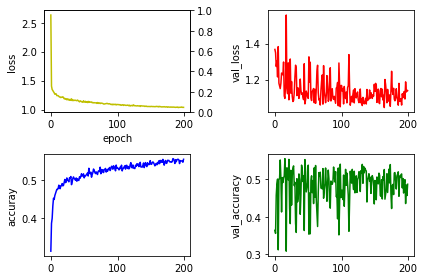

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist_.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist_.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist_.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist_.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [76]:
model_all_.evaluate(X_test,Y_test,verbose =2)

61/61 - 0s - loss: 1.1386 - accuracy: 0.4872


[1.138594150543213, 0.4871794879436493]

In [84]:
model_all_2 = keras.models.Sequential()
model_all_2.add(keras.layers.Dense(units = 32,input_dim = 11,activation = 'relu'))
model_all_2.add(keras.layers.Dense(units = 11,activation = 'softmax'))

model_all_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_all_2.summary()


hist_2 = model_all_2.fit(X_train,Y_train,epochs=800,batch_size=64,validation_data = (X_test,Y_test))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_87 (Dense)             (None, 11)                363       
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
72/72 [==============================] - 1s 4ms/step - loss: 19.1334 - accuracy: 0.0912 - val_loss: 2.4662 - val_accuracy: 0.3221
Epoch 2/800
72/72 [==============================] - 0s 1ms/step - loss: 2.1379 - accuracy: 0.3631 - val_loss: 1.4842 - val_accuracy: 0.4938
Epoch 3/800
72/72 [==============================] - 0s 1ms/step - loss: 1.4365 - accuracy: 0.4130 - val_loss: 1.3058 - val_accuracy: 0.4764
Epoch 4/800
72/72 [==============================] - 0s 1ms/step - loss: 1.3569 - accuracy: 0

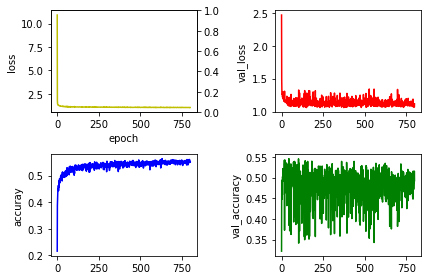

In [87]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist_2.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist_2.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist_2.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist_2.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [88]:
model_all_2.evaluate(X_test,Y_test,verbose =2)

61/61 - 0s - loss: 1.1154 - accuracy: 0.4928


[1.1154253482818604, 0.49282050132751465]

In [83]:
model_all_3 = keras.models.Sequential()

model_all_3.add(keras.layers.Dense(units = 64,input_dim = 11,activation = 'relu'))

model_all_3.add(keras.layers.Dense(units = 32,input_dim = 11,activation = 'relu'))
model_all_3.add(keras.layers.Dense(units = 20,input_dim = 11,activation = 'relu'))

model_all_3.add(BatchNormalization())
model_all_3.add(keras.layers.Dense(units = 11,activation = 'softmax'))

model_all_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_all_3.summary()


hist_3 = model_all_3.fit(X_train,Y_train,epochs=1000,batch_size=64,validation_data = (X_test,Y_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_83 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_84 (Dense)             (None, 20)                660       
_________________________________________________________________
batch_normalization_3 (Batch (None, 20)                80        
_________________________________________________________________
dense_85 (Dense)             (None, 11)                231       
Total params: 3,819
Trainable params: 3,779
Non-trainable params: 40
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 4ms/step - loss: 2.4430 - accuracy: 0.1228 - val_loss: 2.17

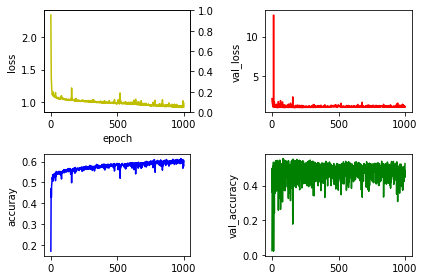

In [85]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

acc_ax = ax1.twinx()

ax1.plot(hist_3.history['loss'], 'y', label='train loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')


ax2.plot(hist_3.history['val_loss'], 'r', label='val loss')
ax2.set_ylabel('val_loss')


ax3.plot(hist_3.history['accuracy'], 'b', label='accuracy')
ax3.set_ylabel('accuray')

ax4.plot(hist_3.history['val_accuracy'], 'g', label='val_accuracy')
ax4.set_ylabel('val_accuracy')



plt.tight_layout()

In [86]:
model_all_3.evaluate(X_test,Y_test,verbose =2)

61/61 - 0s - loss: 1.1172 - accuracy: 0.5256


[1.1172369718551636, 0.5256410241127014]